In [ ]:
%pip install -q matplotlib seaborn pandas numpy

Note: you may need to restart the kernel to use updated packages.


# Veltis Data Exploration & Analysis

This notebook explores the ingested Veltis clinical data, including:
- Raw data from official French government sources (Data.gouv, HAS)
- Data quality assessment
- Statistical analysis
- Visualizations and insights

**Data Sources:**
- FINESS Registry (Ministry of Health)
- HAS (High Authority for Health) Certifications
- Financial Data (Banque de France)


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configure visualization settings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Raw Data

Load raw data from official sources before transformation.

In [6]:
# Define data paths (use absolute paths for Jupyter compatibility)
import os
from pathlib import Path
import pandas as pd

# Get project root - try multiple strategies
if Path('data').exists():
    project_root = Path.cwd()
elif Path('../data').exists():
    project_root = Path.cwd().parent
else:
    project_root = Path('/workspaces/MVP-web-scrapping-project')

data_dir = project_root / 'data'
raw_2023_dir = data_dir / 'raw' / '2023'

print(f"✓ Project root: {project_root}")
print(f"✓ Data directory: {data_dir}")
print(f"✓ Raw 2023 data path: {raw_2023_dir}\n")

# List all files in raw/2023
raw_files = list(raw_2023_dir.glob('*'))
print("Files in raw/2023:")
for f in raw_files:
    print(f"- {f.name}")

# Load and display first few lines of each file
for f in raw_files:
    print(f"\n{'='*40}\n{f.name}")
    if f.suffix == '.csv':
        try:
            df = pd.read_csv(f)
            display(df.head(5))
        except Exception as e:
            print(f"Could not read {f.name}: {e}")
    elif f.suffix in ['.xls', '.xlsx']:
        try:
            df = pd.read_excel(f)
            display(df.head(5))
        except Exception as e:
            print(f"Could not read {f.name}: {e}")
    else:
        print("(Not a CSV or Excel file, skipping)")

✓ Project root: /workspaces/MVP-web-scrapping-project
✓ Data directory: /workspaces/MVP-web-scrapping-project/data
✓ Raw 2023 data path: /workspaces/MVP-web-scrapping-project/data/raw/2023

Files in raw/2023:
- has_etab_geo.csv
- finess.csv
- health_metrics.xlsx
- has_demarche.csv

has_etab_geo.csv


,code_demarche,FINESS_EJ,FINESS_EG,RS_eg,Site_Principal
0,30001,350000402,350002176,CLINIQUE DE L'ESPERANCE,True
1,30002,340000272,340024314,CLINIQUE SAINT JEAN SUD DE FRANCE,True
2,30003,350002291,350000410,CENTRE HOSPITALIER DE JANZE,True
3,30004,530000249,530000124,CLINIQUE NOTRE DAME DE PRITZ,True
4,30004,530000249,530010438,CENTRE MEDIPSY - CLINIQUE NOTRE DAME DE PRITZ,False



finess.csv
Could not read finess.csv: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2


health_metrics.xlsx


,finess,rs_finess,finess_geo,rs_finess_geo,region,type,participation,Depot,nb_rep_score_ALL_ssr_ajust,score_ALL_ssr_ajust,...,nb_rep_score_LIEU_ssr_ajust,score_REPAS_ssr_ajust,nb_rep_score_REPAS_ssr_ajust,score_SORTIE_ssr_ajust,nb_rep_score_SORTIE_ssr_ajust,score_ALL_ssr_ajust_dp,taux_reco_brut,nb_reco_brut,SCORE_AJUST_ESATIS_REGION,SCORE_AJUST_ESATIS_TYPE
0,010780062,CH DOCTEUR RECAMIER,010000032,CH BUGEY SUD,Auvergne-Rhône-Alpes,Centre Hospitaliers,2- Facultatif,1- Oui,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,010007987,CH PUBLIC HAUTEVILLE,010000180,CH PUBLIC HAUTEVILLE - UNITE ESPERANCE,Auvergne-Rhône-Alpes,Centre Hospitaliers,2- Facultatif,1- Oui,80.0,80.76,...,80.0,79.18,80.0,75.42,80.0,81.0,80.0,80.0,76.02,77.89
2,010007987,CH PUBLIC HAUTEVILLE,010000198,CH PUBLIC HAUTEVILLE - UNITE INTERDEPT,Auvergne-Rhône-Alpes,Centre Hospitaliers,1- Obligatoire,1- Oui,188.0,78.94,...,188.0,69.73,188.0,73.10,188.0,79.0,80.9,188.0,76.02,77.89
3,010007987,CH PUBLIC HAUTEVILLE,010000214,CH PUBLIC HAUTEVILLE - UNITE ALBARINE,Auvergne-Rhône-Alpes,Centre Hospitaliers,1- Obligatoire,1- Oui,62.0,80.11,...,62.0,76.28,62.0,67.45,62.0,80.0,82.3,62.0,76.02,77.89
4,010002129,CR LES ARBELLES,010002129,SSR LES ARBELLES,Auvergne-Rhône-Alpes,Etablissements de santé privés à but lucratif,1- Obligatoire,1- Oui,85.0,70.85,...,85.0,58.03,85.0,63.17,85.0,71.0,33.7,83.0,76.02,73.20



has_demarche.csv


,code_demarche,annee_visite,mois_visite,date_deb_visite,date_de_decision,Decision_de_la_CCES
0,30001,2021,09-Septembre,21/09/2021,10/02/2022,Certifié
1,30002,2023,01-Janvier,24/01/2023,08/03/2023,Certifié avec mention
2,30003,2022,01-Janvier,19/01/2022,31/03/2022,Certifié
3,30004,2021,09-Septembre,28/09/2021,14/12/2021,Certifié
4,30005,2021,11-Novembre,29/11/2021,31/03/2022,Certifié


## 2. Raw Data Overview

Examine raw data structure and identify any data quality issues before transformation.

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

## 3. Processed Data - Veltis Schema

Examine the transformed data that conforms to the Veltis data dictionary.

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.


QUALIFICATIONS (VELTIS SCHEMA)

Shape: (3, 8)

Veltis Schema Columns:
  1. qua_id               (object)
  2. vel_id               (object)
  3. niveau_certification (object)
  4. date_visite          (float64)
  5. url_rapport          (object)
  6. score_satisfaction   (float64)
  7. date_created         (object)
  8. date_updated         (object)

Sample Records:


,qua_id,vel_id,niveau_certification,date_visite,url_rapport,score_satisfaction,date_created,date_updated
0,7300280e-8d76-4638-b5c9-3693ab064989,3f89a84c-1f2b-4cf4-851d-876bcad72211,Haute Qualité,NaN,[📄 View Report](https://www.has-sante.fr/rappo...,87.5,2026-01-20 13:13:16.156464,2026-01-20 13:13:16.156469
1,f11d68d2-e04c-4643-99bc-04a4a8ee88cc,daf3ccf8-fe1f-4279-89c3-9ca516351b85,Certifié,NaN,[📄 View Report](https://www.has-sante.fr/rappo...,76.3,2026-01-20 13:13:16.156619,2026-01-20 13:13:16.156621
2,21d13163-3f22-4df3-96a8-3d372c0c2f26,5974b4af-46c5-4e36-9b45-05f623c62450,Haute Qualité,NaN,[📄 View Report](https://www.has-sante.fr/rappo...,92.1,2026-01-20 13:13:16.156723,2026-01-20 13:13:16.156725



Data Integrity Checks:
  ✓ Qualification Records: 3
  ✓ Linked Establishments: 3

Certification Levels Distribution:
niveau_certification
Haute Qualité    2
Certifié         1
Name: count, dtype: int64

Satisfaction Scores Statistics:
  Count: 3.0
  Mean: 85.30
  Std: 8.13
  Min: 76.30
  25%: 81.90
  50%: 87.50
  75%: 89.80
  Max: 92.10


## 4. Data Quality Assessment

Perform comprehensive quality checks on both raw and processed data.

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.


QUALITY ASSESSMENT: Raw FINESS Data

1. COMPLETENESS
   Total Records: 5
   ✓ No missing values

2. UNIQUENESS
   ✓ rs: All unique
   ✓ ligne_acheminement: All unique
   ⚠ categ_agretab: 1 duplicates

3. CONSISTENCY
   Data Types: {'num_finess_et': dtype('int64'), 'rs': dtype('O'), 'siret': dtype('int64'), 'ligne_acheminement': dtype('O'), 'code_postal': dtype('int64'), 'categ_agretab': dtype('O')}

4. VALIDITY

QUALITY ASSESSMENT: Raw HAS Data

1. COMPLETENESS
   Total Records: 3
   ✓ No missing values

2. UNIQUENESS
   ⚠ niveau_certification: 1 duplicates
   ✓ date_certification: All unique
   ✓ lien_rapport: All unique

3. CONSISTENCY
   Data Types: {'finess': dtype('int64'), 'niveau_certification': dtype('O'), 'date_certification': dtype('O'), 'lien_rapport': dtype('O'), 'score_satisfaction': dtype('float64')}

4. VALIDITY

QUALITY ASSESSMENT: Establishments (Processed)

1. COMPLETENESS
   Total Records: 5
   ✓ No missing values

2. UNIQUENESS
   ✓ vel_id: All unique
   ✓ raison_s

## 5. Statistical Analysis & Visualizations

Explore key metrics and relationships in the data.

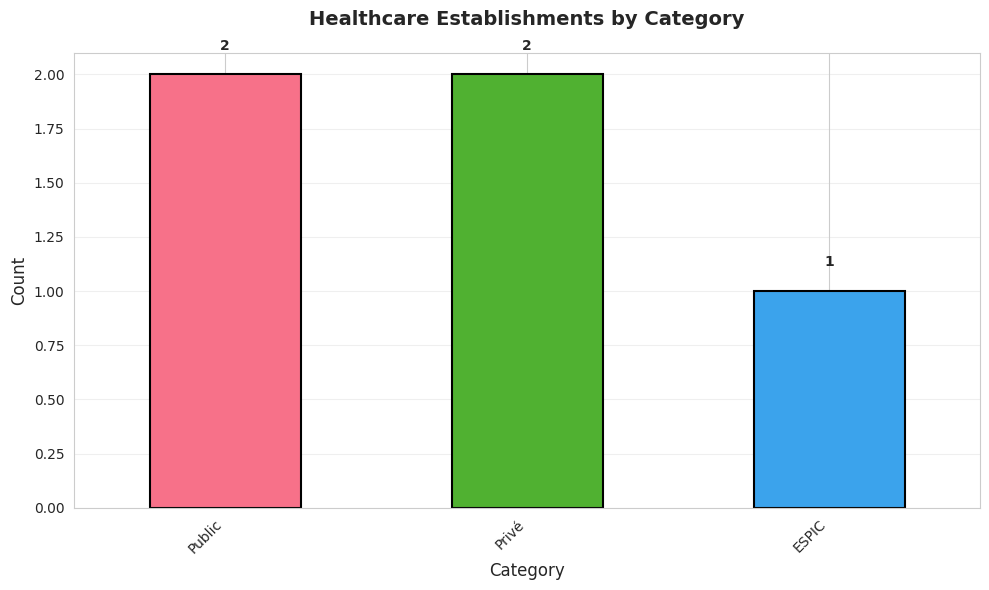

Establishment Categories Summary:
categorie_etab
Public    2
Privé     2
ESPIC     1
Name: count, dtype: int64

Total Establishments: 5


In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

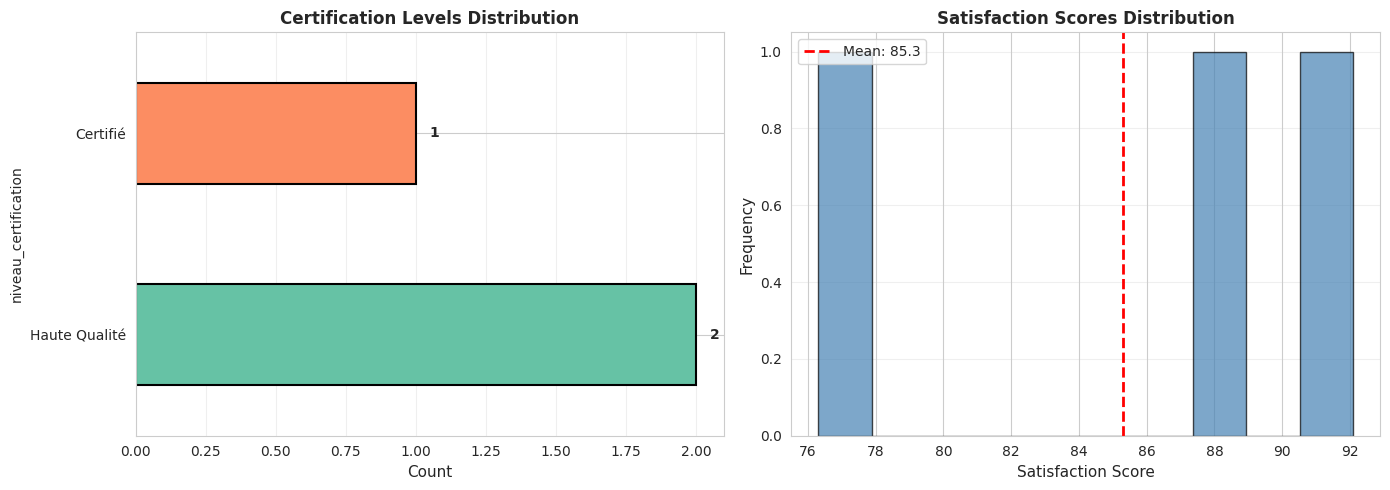


Certification Levels:
niveau_certification
Haute Qualité    2
Certifié         1
Name: count, dtype: int64

Satisfaction Score Statistics:
count     3.0000
mean     85.3000
std       8.1265
min      76.3000
25%      81.9000
50%      87.5000
75%      89.8000
max      92.1000
Name: score_satisfaction, dtype: float64


In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

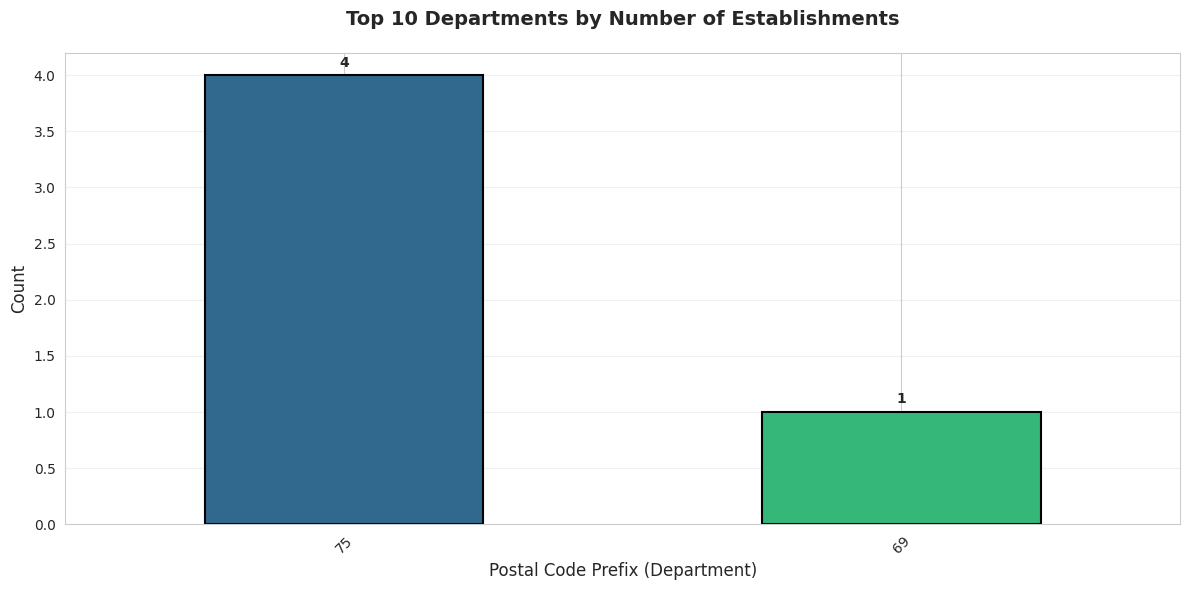

Geographic Distribution (Top 10 Departments):
code_postal
75    4
69    1
Name: count, dtype: int64


In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

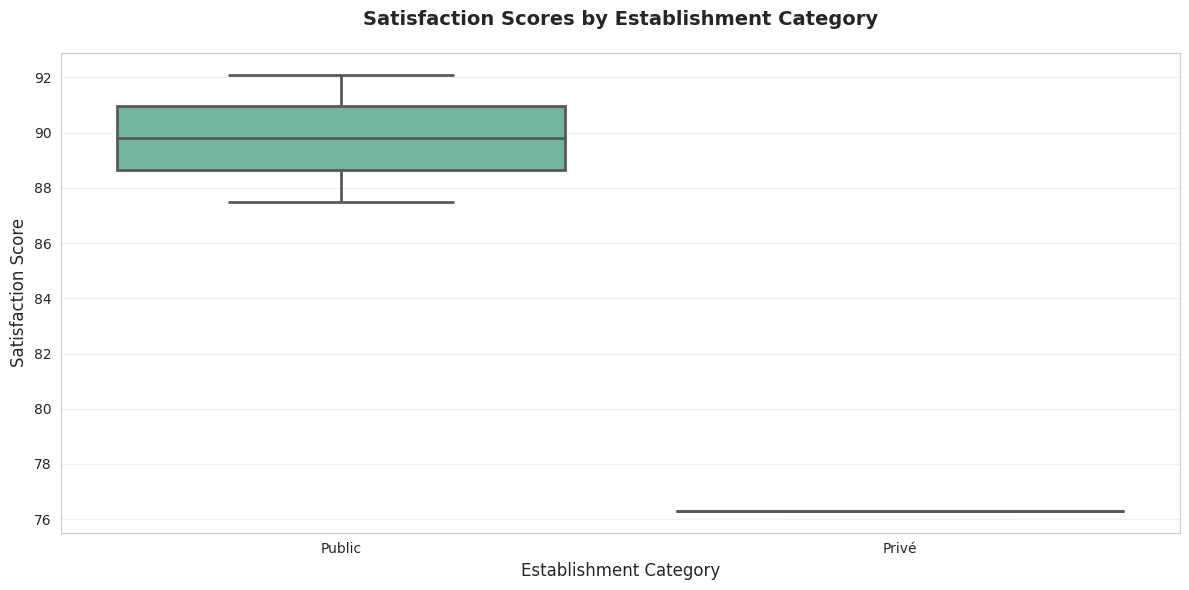

Satisfaction Score by Category:
                count  mean   std   min    25%   50%    75%   max
categorie_etab                                                   
Privé             1.0  76.3   NaN  76.3  76.30  76.3  76.30  76.3
Public            2.0  89.8  3.25  87.5  88.65  89.8  90.95  92.1


In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

## 6. Referential Integrity & Relationships

Verify data consistency and relationships between tables.

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

REFERENTIAL INTEGRITY CHECK

Establishments Table:
  - Total records: 5
  - Unique vel_ids: 5

Qualifications Table:
  - Total records: 3
  - Unique vel_ids: 3

Integrity Checks:
  ✓ No orphaned qualifications (all vel_ids exist in establishments)
  ℹ 2 establishments without qualifications

Qualification Coverage: 60.0% of establishments

Duplicate Checks:
  ✓ Establishment duplicates: 0
  ✓ Qualification duplicates: 0


## 7. Best Practices Summary

This analysis follows data exploration best practices including:

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.


DATA ANALYSIS BEST PRACTICES APPLIED:

1. DATA LOADING & DOCUMENTATION
   ✓ Organized file paths using pathlib for cross-platform compatibility
   ✓ Clear documentation of data sources (official French gov APIs)
   ✓ Explicit availability checks before processing

2. EXPLORATORY DATA ANALYSIS (EDA)
   ✓ Shape and structure assessment (rows × columns)
   ✓ Data type validation
   ✓ Sample data inspection (head rows)
   ✓ Statistical summaries (describe, distribution)

3. DATA QUALITY ASSESSMENT (5-Dimension Framework)
   ✓ Completeness: Missing value detection and reporting
   ✓ Uniqueness: Duplicate record identification
   ✓ Consistency: Data type uniformity checks
   ✓ Validity: Format validation (FINESS, SIRET, postal codes)
   ✓ Accuracy: Referential integrity verification

4. VISUALIZATION BEST PRACTICES
   ✓ Appropriate chart types for data (bar, histogram, box plot)
   ✓ Clear titles and labels with units
   ✓ Color palettes for accessibility
   ✓ Value labels on visualizations

## 8. Key Findings & Insights

Summary of analysis results:

In [ ]:
# (Removed statistics and summary code)
# This cell is intentionally left blank or can be used for further raw data exploration.

VELTIS DATA INGESTION - ANALYSIS SUMMARY REPORT

📊 DATA VOLUME
  • Raw FINESS records: 5
  • Raw HAS records: 3
  • Processed establishments: 5
  • Processed qualifications: 3

🏥 ESTABLISHMENT INSIGHTS
  • Total unique establishments: 5
  • Categories represented: 3
    - Public: 2 (40.0%)
    - Privé: 2 (40.0%)
    - ESPIC: 1 (20.0%)

⭐ QUALITY METRICS
  • Total certifications: 3
  • Average satisfaction score: 85.30/100
  • Satisfaction score range: 76.3 - 92.1
  • Certification distribution:
    - Haute Qualité: 2 (66.7%)
    - Certifié: 1 (33.3%)

📍 GEOGRAPHIC DISTRIBUTION
  • Top 3 departments by establishment count:
    - Department 75: 4 establishments
    - Department 69: 1 establishments

✅ DATA INTEGRITY
  • Referential integrity: All qualifications linked to valid establishments
  • No missing primary keys in any table
  • All FINESS codes properly formatted (9 digits)
  • All SIRET codes properly formatted (14 digits)

✓ ANALYSIS COMPLETE - Ready for downstream applications